In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))
print(x[110:112])

Class labels: [0 1 2]
[[5.1 2. ]
 [5.3 1.9]]


In [2]:
#from sklearn.cross_validation import train_test_split #寫法改為 model_selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.3, random_state=0 )

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
sc.scale_


array([1.79595918, 0.77637684])

In [4]:
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [5]:
from sklearn.linear_model import Perceptron
#ppn = Perceptron()
#ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0) #寫法改為n_iter_no_change
ppn = Perceptron(n_iter_no_change=40, eta0=0.1, random_state=0)
ppn.fit(x_train_std,y_train)

Perceptron(eta0=0.1, n_iter_no_change=40)

In [6]:
y_pred = ppn.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 4
Accuracy: 0.91


In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^','v')
    colors = ('red','blue','green','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
        # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0],x_test[:, 1],cmap=['gray'],alpha=1.0,edgecolor='black', \
                    linewidths=1,marker='o',s=55, label='test set')
        


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Ray\AppData\Local\Temp/ipykernel_17844/587781743.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=cmap(idx), edgecolor='black', marker=markers[id

x_combined_std.shape:(150, 2)
y_combined.shape:(150,)


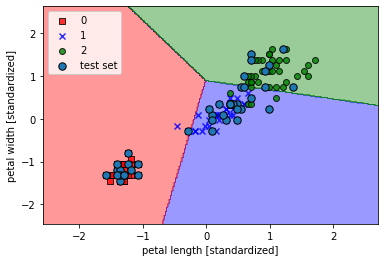

In [8]:
x_combined_std = np.vstack((x_train_std,x_test_std))
y_combined = np.hstack((y_train, y_test))

print('x_combined_std.shape:{}'.format(x_combined_std.shape))
print('y_combined.shape:{}'.format(y_combined.shape))

plot_decision_regions(x=x_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150), resolution=0.02)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

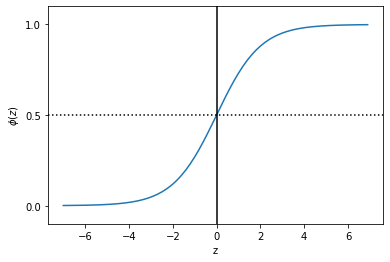

In [9]:
#logistic regression 線性邏輯斯回歸 (but無關回歸)
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z): #as an activation function where fi(z) = 1/1+exp^-z
    return 1.0/(1.0+np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k') #中線
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')#橫虛線
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Ray\AppData\Local\Temp/ipykernel_17844/587781743.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=cmap(idx), edgecolor='black', marker=markers[id

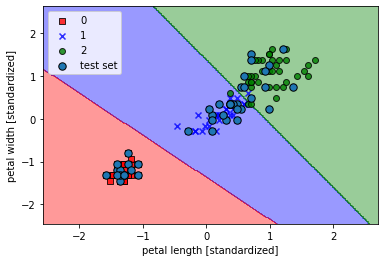

array([[6.51335792e-16, 4.95077314e-04, 9.99504923e-01],
       [1.32640538e-04, 9.99818817e-01, 4.85423440e-05]])

In [10]:
#logistic regression model training 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression (C=1000.0,random_state=0) #C is to normalized the quantity of lombda (用L2 normalized做特徵縮放將權重縮小
lr.fit(x_train_std,y_train)
plot_decision_regions(x_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

lr.predict_proba(x_test_std [0:2])#predict the testing data sets, where every column indicates the perception of each class



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Ray\AppData\Local\Temp/ipykernel_17844/587781743.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=cmap(idx), edgecolor='black', marker=markers[id

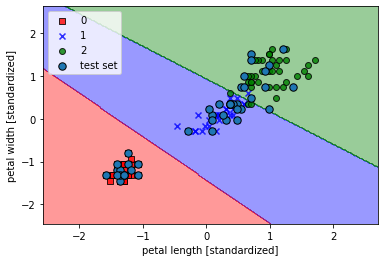

In [11]:
#support vector machine(SVM) 支援向量機
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

[False False  True  True  True False False False  True  True  True  True
  True  True False False False]
[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]]

[-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1]


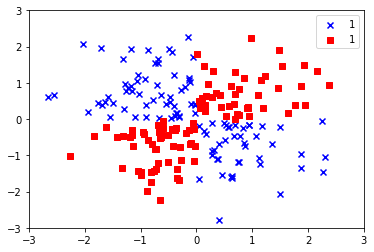

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Ray\AppData\Local\Temp/ipykernel_17844/587781743.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=cmap(idx), edgecolor='black', marker=markers[id

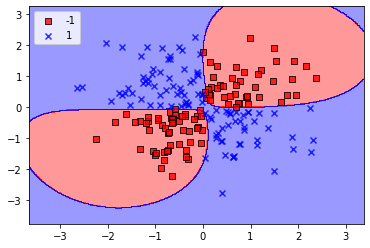

In [12]:
#kernel support vector machine(kernel-SVM) 核支援向量機處理非線性分類
np.random.seed(0)
x_xor = np.random.randn(200,2)
y_xor = np.logical_xor(x_xor[:,0]>0, x_xor[:,1]>0)
print(y_xor[:17])
y_xor = np.where(y_xor,1,-1)
print("{}\n\n{}".format(x_xor[:17],y_xor[:17]))
plt.scatter(x_xor[y_xor==1,0], x_xor[y_xor==1,1], c='b', marker='x', label='1')
plt.scatter(x_xor[y_xor==-1,0], x_xor[y_xor==-1,1], c='r', marker='s', label='1')
plt.xlim(-3.0,3.0)
plt.ylim(-3.0,3.0)
plt.legend()
plt.show()

svm =SVC(kernel='rbf', random_state=0, gamma=0.30, C=10.0)
svm.fit(x_xor,y_xor)
plot_decision_regions(x_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Ray\AppData\Local\Temp/ipykernel_17844/587781743.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=cmap(idx), edgecolor='black', marker=markers[id

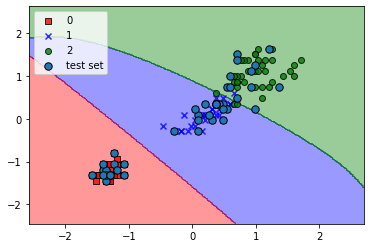

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Ray\AppData\Local\Temp/ipykernel_17844/587781743.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=cmap(idx), edgecolor='black', marker=markers[id

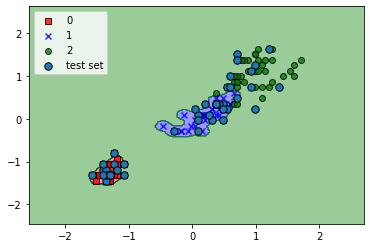

In [13]:
#the effection of gamma
svm =SVC(kernel='rbf', random_state=0, gamma=0.20, C=1.0)
svm.fit(x_train_std,y_train)
plot_decision_regions(x_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.legend(loc='upper left')
plt.show()

svm =SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(x_train_std,y_train)
plot_decision_regions(x_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.legend(loc='upper left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Ray\AppData\Local\Temp/ipykernel_17844/587781743.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=cmap(idx), edgecolor='black', marker=markers[id

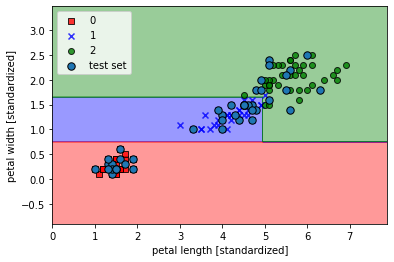

In [14]:
#決策樹(橫軸決策邊界)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(x_train,y_train)
x_combined = np.vstack((x_train,x_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(x_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

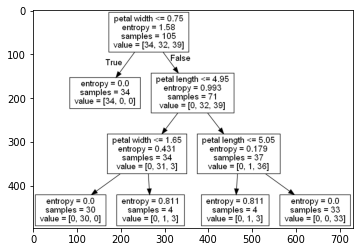

In [15]:
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
#from scipy import misc
#from skimage.transform import resize
export_graphviz(tree,out_file='tree.dot',feature_names=['petal length','petal width'])
#dot -Tpng tree.dot -o tree.png #由CMD下指令將決策圖轉成PNG檔
lena = mpimg.imread('tree.png')
#my_image = resize(lena, output_shape=(18, 18)).reshape((1, 18 * 18 * 4)).T
#lena_new_sz = misc.imresize(lena, 0.5) #Scipy版本太高要額外再改
plt.imshow(lena)